In [92]:
#pip install pandas openpyxl 
#!pip install wordcloud
#!pip install wordcloud matplotlib
#!pip install nltk

In [82]:
import pandas as pd
import numpy as np
import re
import unicodedata
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

**Import datasets**

In [48]:
# Woman
df1 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman.csv')
df2 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman1.csv')
df3 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman2.csv')
df4 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman3.csv')
df5 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/woman/woman4.csv')

In [49]:
# Merge woman datasets
df_woman = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

Add “profile” column to indicate whether the profile is female or male.

In [50]:
df_woman['profile'] = 'woman'

In [51]:
# Man
df7 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man.csv')
df8 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man2.csv')
df9 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man3.csv')
df10 = pd.read_csv('/Users/roraimachavez/Downloads/7.IRONHACK/Projects/final_project/data/man/man4.csv')

In [52]:
# Merge man datasets
df_man = pd.concat([df7, df8, df9, df10], ignore_index=True)

Add “profile” column to indicate whether the profile is female or male.

In [53]:
df_man['profile'] = 'man'

Merged both datasets

In [54]:
df = pd.concat([df_woman, df_man], ignore_index=True)

In [55]:
df.head()

,name,age,location,story_about,job,education,heightv2,intentionsv2,exercisev2,educationv2,drinkingv2,smokingv2,familyPlansv2,religionv2,Politicsv2,genderv2,starSignv2,profile
0,Tarek,26,"Sant Cugat del Vallès, Barcelona",NaN,NaN,NaN,175 cm,Something casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woman
1,Guillem,41,Barcelona,Philosophy and film studies.\n\nFrom electroni...,Film Editor And Teacher,UAB-UB-EDC,184 cm,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,NaN,NaN,woman
2,Bernardo,31,Barcelona,NaN,NaN,NaN,180 cm,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,Man,NaN,woman
3,Leonardo,28,Barcelona,Looking for company to explore the World,Electrical Engineer,UFSC,174 cm,NaN,Sometimes,Undergraduate degree,Socially,Never,Not sure yet,NaN,Apolitical,Man,Aquarius,woman
4,Ahmed,31,Barcelona,NaN,NaN,NaN,186 cm,Relationship,Sometimes,Graduate degree,Socially,Socially,Not sure yet,NaN,Apolitical,Man,Scorpio,woman


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2040 non-null   object
 1   age            2040 non-null   int64 
 2   location       2026 non-null   object
 3   story_about    1524 non-null   object
 4   job            918 non-null    object
 5   education      602 non-null    object
 6   heightv2       1998 non-null   object
 7   intentionsv2   1930 non-null   object
 8   exercisev2     1945 non-null   object
 9   educationv2    1845 non-null   object
 10  drinkingv2     1979 non-null   object
 11  smokingv2      1890 non-null   object
 12  familyPlansv2  1652 non-null   object
 13  religionv2     1338 non-null   object
 14  Politicsv2     1080 non-null   object
 15  genderv2       1967 non-null   object
 16  starSignv2     1861 non-null   object
 17  profile        2040 non-null   object
dtypes: int64(1), object(17)
memo

Change columns names

In [57]:
new_column_names = {
    'story_about' : 'about_me',
    'heightv2': 'height',
    'intentionsv2': 'intentions',
    'exercisev2': 'exercise',
    'educationv2': 'educationTag',
    'drinkingv2': 'drinking',
    'smokingv2': 'smoking',
    'familyPlansv2': 'childrens',
    'religionv2': 'religion',
    'Politicsv2': 'politics',
    'genderv2': 'gender',
    'starSignv2': 'zodiacSign',
}

df.rename(columns=new_column_names, inplace=True)

Remove "cm" in column height so is a int number

In [58]:
df['height'] = df['height'].str.replace(' cm', '')

Remove "Barcelona" in column location so I only take the town

In [59]:
df['location'] = df['location'].str.split(',').str[0]

Looking for duplicate column

In [60]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows) 

0

Use regex to make the job column more available

In [61]:
# Apply unidecode to each DataFrame element to remove accents.
df = df.applymap(lambda x: ''.join([c for c in unicodedata.normalize('NFKD', x) if not unicodedata.combining(c)]) if isinstance(x, str) else x)

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_2777/3211241325.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: ''.join([c for c in unicodedata.normalize('NFKD', x) if not unicodedata.combining(c)]) if isinstance(x, str) else x)


In [62]:
df["job"].count()

918

In [63]:
#General view of the activities
unicos = df["job"].unique()
for i in unicos:
    print(i)
len(unicos)

nan
Film Editor And Teacher
Electrical Engineer
model
Enginyer informatic
Consultant at Recruitment
Program Manager in IT & Podcaster
Ceo
Account manager
Startup Founder
Padagoge fur Kinder at Kindergarten
Empresario
Comunicacio
Higienista Bucodental
Growth Director
Compositor musical at free worker
Pizzaiolo at Alma Mia
La Vida
Medico
Business Manager at Tecnologia
Ingeniero de Software
Professor
Software Engineer at Moving Picture Company
Infectious Diseases Medical Doctor
General partner at Encomenda Venture Capital
Sales team leader Catalunya at TheFork
Software Engineer
Project Manager at IT
Realtor at Berkshire Hathaway Home Services Golden Properties
Tecnic Electric
Sales at Finland
High school teacher
Chef at Aquamarina Hotel
Country Manager at Tech SaaS
Tecnico en Anatomia Patologica
escritor at zaino
Beca en investigacion at Instituto de Investigacion en IA
Global Marketing Director
Marketing at Aura Empresas
Director at Inteligencia Artificial
buisness-owner
Engineer
Associa

791

In [64]:
dict_job = {
    r"[Pp]iloto|[Pp]iloto": "pilot",
    r"[Ff]arma|[Pp]harmaci": "pharmacisty",
    r"[Aa]ctor|[Mm]odel|[Aa]ctriz": "actor/actress",
    r"[Cc]reative|[Cc]reativo|[Aa]rte": "creative director",
    r"[Dd]esign|[Dd]iseñad|[Dd]ecorateur|[Dd]isenadora|[Ii]nterioris": "design",
    r"[Cc]eo": "ceo",
    r"[Ff]uncionar|[Pp]oli": "civil servant",
    r"[Aa]rchitect|[Aa]rquitec": "architect",
    r"[Aa]dministr": "administrator",
    r"[Mm]echanical|[Mm]ecanica": "mechanical engineer",
    r"[Dd]entist|[Oo]dontol|[Bb]ucal|[Dd]ental": "dentist",
    r"[Rr]eal state|[Ii]nmobi": "real state",
    r"[Ff]isioterapeuta|[Pp]hysiotherapist": "physiotherapist",
    r"[Cc]onsult": "consultant",
    r"[Ll]ogistic": "logistics",
    r"[Tt]elecommunications|[Tt]elecomuni": "telecommunications",
    r"[Ee]dition|3[Dd],[Mm]otion,[Cc]olorist": "editor",
    r"[Ww]eb|[Dd]evelo": "web developer",
    r"[Cc]ontable|[Bb]ank": "accountant",
    r"[Ff]ilm|[Aa]udiovisual|[Aa]v|[Ss]creenwriter|[Cc]ineasta|[Dd]ocumentalista|[Gg]uionista": "film industry",
    r"[Ss]oftware|[Pp]rogramador|[Pp]rogramm": "software engineer",
    r"[Aa]cco": "account manager",
    r"[Mm]usic|[Cc]omposit|[Dd]j|[Ss]inger": "music industry",
    r"[Rr]ecruitment|[Hh]R|[Rr]RHH|[Hh]uman|[Rr]Recursos": "recruitment or consultant",
    r"[Ss]ales|[Ss]eller": "sales",
    r"[Pp]roject": "project manager",
    r"[Tt]eacher|[Pp]rofessor|[Pp]edagogo|[Pp]rofe|[Mm]aestro|[Ee]ducadora|[Ee]ntrenador": "teacher",
    r"[Ww]riter|[Ee]scritor": "writer",
    r"[Ff]ounder|[Ff]undador|[Oo]wner|[Pp]ropietario": "founder/owner",
    r"[Dd]octor|[Mm]edico|[Ss]anidad|[m]etge|[Ii]nfermer|[Ee]nfermero|[Nn]urse|[Pp]ediatra": "doctor or nurse",
    r"[Cc]omunic|[Cc]ommuni|[Ll]ocutor|[Cc]omms|[Pp]eriodista|[Jj]ournalist": "communication",
    r"[Cc]hef|[Cc]ocinero|[Cc]uiner": "chef",
    r"[Ee]ntrepreneur|[Ee]mpresario|[Bb]uisness|[Bb]usiness|[Ee]mprended": "entrepreneur",
    r"[Mm]arketing|[Cc]ontent|[Cc]opywriter|[Aa]dvert|[Pp]ublicita|[Ss]ocial Media|[Dd]igital": "marketing",
    r"[Qq]imic|[Qq]uimi|[Cc]hemical": "chemical",
    r"[Ff]inanc|[Ee]conomista": "financial",
    r"[Aa]bogad|[Ll]awyer|[Aa]dvocat": "lawyer",
    r"[Aa]arqueologo|[Aa]rchaeologist": "archaeologist",
    r"[Tt]ech": "tech",
    r"[Aa]nalyst|[Aa]nalista|[Dd]ata": "data analyst/scientist",
    r"[Ss]tudent|[Es]tudiante|[Pp]hD": "student",
    r"[Cc]onstruction|[Cc]onstruc|[Oo]bra": "construction",
    r"[Ff]otogra|[Pp]hotogra": "photographer",
    r"[Pp]sicolog|[Pp]hotogra|[Tt]herapist": "psychologist",
    r"[Aa]artifi": "AI",
    r"[Oo]rganizador|[Ee]vents|[Pp]R|[Pp]ublic Relations|[Rr]elacionista": "Events or PR",
    r"[Rr]esearch|[Rr]esearcher" : "research"}


In [65]:
# Function to categorize species
def categorize_activities(text, dict_job):
    if isinstance(text, str):  # Check if the value is a text string
        for pattern, category in dict_job.items():
            if re.search(pattern, text):
                return category
    return "Other"  # If it does not match any category, "Other" is returned.

In [66]:
# Clear invalid values in the "job" column
df["job"] = df["job"].fillna("empty")  # Fill NaN values with an empty string
df["job"] = df["job"].astype(str)  # Convert all values to text strings

In [68]:
# Apply the function to categorize activities
df["job"] = df["job"].apply(lambda x: categorize_activities(x, dict_job))

In [83]:
df.head()

,name,age,location,about_me,job,education,height,intentions,exercise,educationTag,drinking,smoking,childrens,religion,politics,gender,zodiacSign,profile
0,Tarek,26,Sant Cugat del Valles,nan,Other,NaN,175,Something casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woman
1,Guillem,41,Barcelona,philosophy and film studies. from electronic t...,film industry,UAB-UB-EDC,184,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,NaN,NaN,woman
2,Bernardo,31,Barcelona,nan,Other,NaN,180,Something casual,Sometimes,Graduate degree,Socially,Socially,Not sure yet,Atheist,Left,Man,NaN,woman
3,Leonardo,28,Barcelona,looking for company to explore the world,Other,UFSC,174,NaN,Sometimes,Undergraduate degree,Socially,Never,Not sure yet,NaN,Apolitical,Man,Aquarius,woman
4,Ahmed,31,Barcelona,nan,Other,NaN,186,Relationship,Sometimes,Graduate degree,Socially,Socially,Not sure yet,NaN,Apolitical,Man,Scorpio,woman


Visualization of more repitet words in about_me colums

In [85]:
# Download the nltk stop words set if you don't already have it
nltk.download('stopwords')

# Define stop words in English and Spanish
stop_words_english = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))
stop_words = stop_words_english.union(stop_words_spanish)

# Function to remove stop words from a text
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roraimachavez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
# Step 1: Remove NaN values and 'NaN' strings
df.dropna(subset=['about_me'], inplace=True)
df = df[df['about_me'].str.lower() != 'nan']

# Step 2: Convert all values to text strings
df['about_me'] = df['about_me'].astype(str)

# Step 3: Remove spaces at the beginning and end of each string, convert to lowercase and replace
df['about_me'] = df['about_me'].str.strip().str.lower().str.replace('\n', ' ')

# Step 4: Removing punctuation marks
df['about_me'] = df['about_me'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Step 5: Apply the function to remove stop words
df['about_me'] = df['about_me'].apply(remove_stop_words)


In [88]:
# Function to generate a word cloud
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()

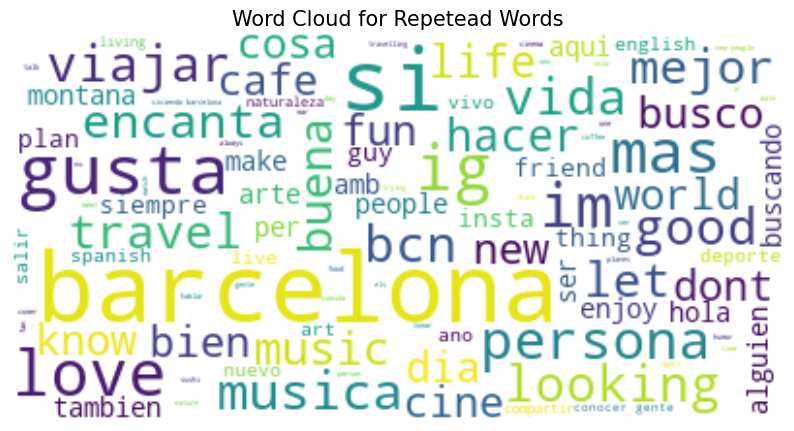

In [90]:
# Generate word clouds for the most repeated words. 
about_me = df.about_me

generate_word_cloud(about_me, "Word Cloud for Repetead Words")
